# Data handling assessment

In [1]:
from DataGen import *   # generates your data
import matplotlib.pyplot as plt ## this has imported matplotlib's pyplot as plt
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10, 7]}) # sets better defaults for matplotlib graphs

import numpy as np  ## this has imported numpy which you can refer to as np
import scipy.stats as stats ## this has importated SciPy's statistics package as stats, you may find this useful.
import scipy.signal as signal ## imports the signal processing module as signal
import scipy.optimize as fit  ## imports the optimization tool box as fit

import glob  # imports the glob module
import warnings  # prevents printing of some warnings
warnings.filterwarnings('ignore')

### Each student has a unique data set to process. 
> 1) To initailise your unique data set insert your 9 digit student number below as a string i.e. inside the inverted commas and run the cell.

The length of ID should be 9


In [2]:
ID = '201493615' #
print(len(ID))

9


### 1) Loading files
- It is useful to be able to load multiple data sets from a folder.

> 1) Run the cell below to initialize your data sets, they will appear in the 'Data sets' folder where you launched this notebook from.

In [4]:
dataFolder(ID) ## this creates your data files to process

- The data that you want to load is contained in .csv files
- Each file contains a single number

> 2) Make a sorted list of these csv file names.    
>3) Then loop through this list and load each csv file.   
>4) On each iteration of the loop print the data you have loaded.   

You should be able to do this in 5 lines or less


In [6]:
files = sorted(glob.glob('Data sets/*.csv')) ## sorted list
for f in files:
    print(np.loadtxt(f)) # loops through and loads data and prints content of␣ each file

8.0
0.0
9.0
9.0
0.0
5.0
1.0
0.0
2.0


### 2) An experimenter has made an extracellular recording from a motor nerve and wants to determine the change in the mean firing rate of this nerve during a voluntary contraction. 


- The sample rate of the recording was 10kHz
- The data is recorded in µV
- The recording is 15 seconds in length
- The voluntary contraction began at 5 seconds and lasted 5 seconds.


> 1) Run the cell below to generate your nerve data as an array


In [7]:
nerve = getSpike(ID) # this loads your data for this task in to the numpy array called 'nerve'

>2) In the cell below plot the nerve recording with the correct time scale.    

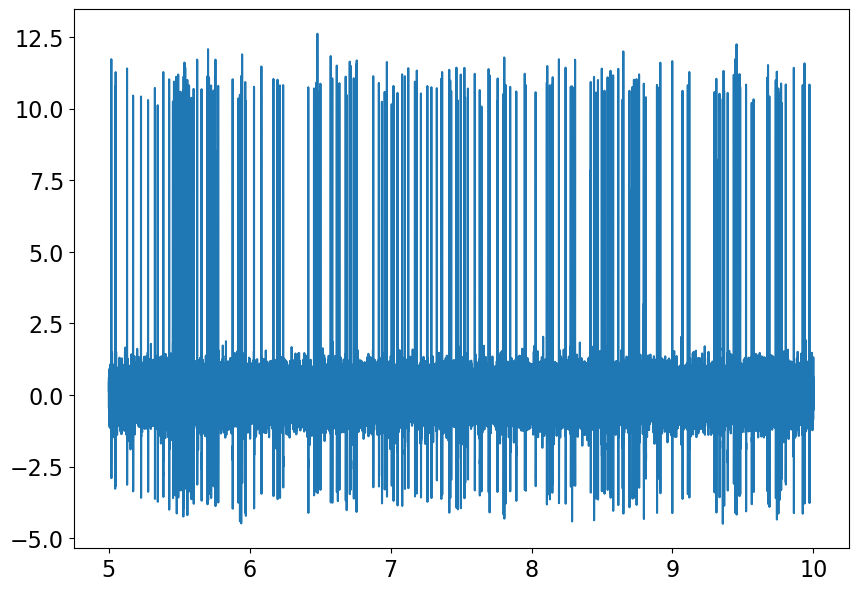

In [10]:
SampleRate=10000
length=10
xScale= np.arange(5,length,1/SampleRate)
five_ten=len(np.arange(0,5,1/SampleRate))
plt.plot(xScale,nerve[five_ten:five_ten+five_ten])

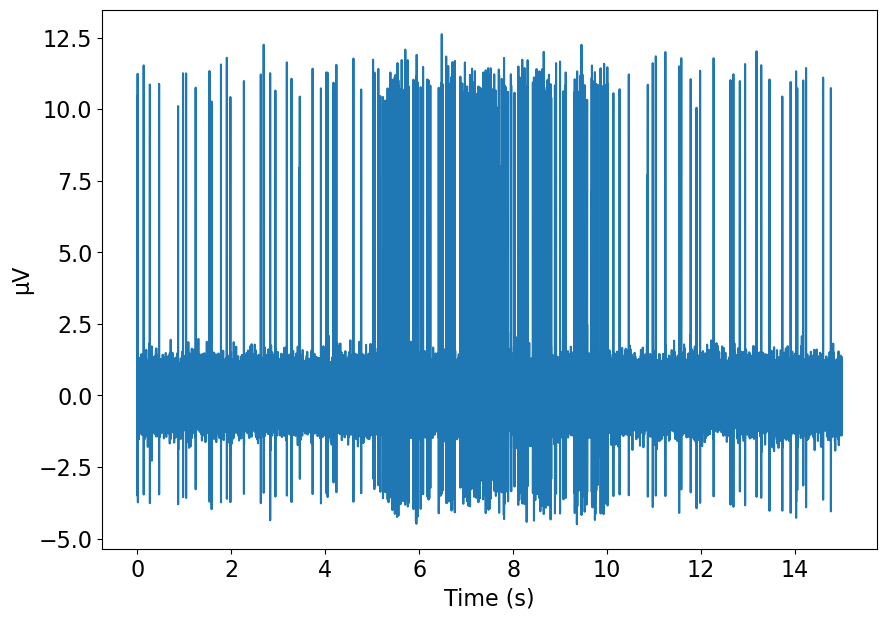

In [9]:
xaxis = np.linspace(0,15, len(nerve))
plt.plot(xaxis, nerve)
plt.ylabel('μV')
plt.xlabel('Time (s)');

>3) Detect spikes in the recording and then:  
     A) Detemrmine the the mean spike rate in Hz during the contraction.  
     B) Determine the change in mean spike rate evoked by the contraction.


In [9]:
spikesCon, _ = signal.find_peaks(nerve[50000:100000], 8) # detect spikes during␣ the contratcion
conRate = len(spikesCon)/5 # calculate spike rate during contraction
spikesAll, _ = signal.find_peaks(nerve, 8) # detect all spikes
baseRate = (len(spikesAll)-len(spikesCon))/10 #calculate base rate by subtracting the detected spikes during contraction. Divide by 10 as there is␣ 10 seconds of basal firing




>4) Print some text reporting the answers to 3A & 3B. 

In [10]:
print('The mean spike rate during contraction was',conRate,'Hz')
print('This was an increase of',conRate-baseRate,'Hz above the basal firing rate')

The mean spike rate during contraction was 46.4 Hz
This was an increase of 35.599999999999994 Hz above the basal firing rate


### 3) An experimenter wants to determine whether a new drug is effective at increasing platelet count in patients with thrombocytopenia (low platelet count). 


- A platelet count below 150,000 platelets µl<sup>-1</sup>  indicates a clinical risk.

- The experimenter has administered the new drug to 900 thrombocytopenia patients and measured platelet counts before and after treatment with the drug.

>1) Run the cell below to load your platelet count data


In [4]:
platelets = getPlatelets(ID) # this loads your data for this task in to the numpy array called 'mRNAs'

- The 1st column of "platelets" is the pre-treatment counts and the 2nd contains the data for the same patients post-treatment.
- Each row corresponds to the platelet count per µl for each patient.

>2) Plot a single graph that clearly displays both histograms of the platelet counts. Use 40 bins for each histogram.    

In [5]:
np.shape(platelets)




(2, 900)

>3) Determine whether the drug has a significant effect. Print some text justifying your conclusion.


>4) Print some text describing whether the new drug is effective at increasing platelet counts to healthy levels?

### 4) An experimenter has recorded the time of wheel running events in an experiment using mice and wants to plot the total wheel turns per day. 


- The experiemnt ran for 35 days
- The time stamps of full wheel turns were saved to a .csv file with 1 file for each day
> 1) Run the cell below to generate your data which will appear in the 'Exercise data' folder

In [3]:
getExercise(ID)

> 2) Load the data from the 'Exercise data' folder and generate a graph displaying the total daily wheel turns against day.  

Text(0, 0.5, 'Wheel turns')

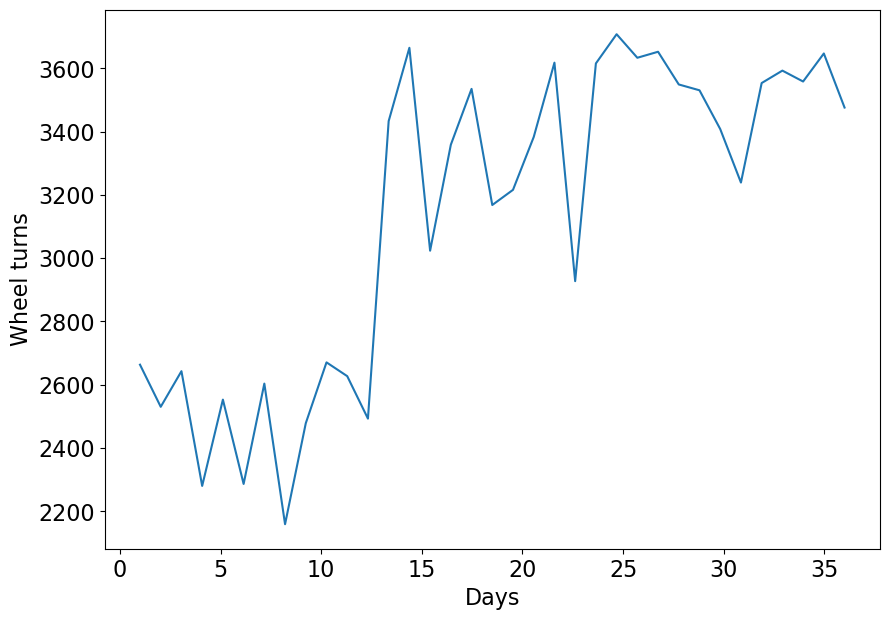

In [4]:
exercise = sorted(glob.glob('Exercise data/*.csv'))
wheelTurns = []
for e in exercise:
    wheelTurns.append(sum(np.loadtxt(e)))

plt.plot(np.linspace(1, 36,len(wheelTurns)),wheelTurns)
plt.xlabel('Days')
plt.ylabel('Wheel turns')





- Methylphenidate, which causes increased locomotor activity in mice, was added to the dirnking water. Judging from your graph on what day was the durg added?

> 3) Print some text with your answer

### 5)  An experimenter is measuring the drug concentration in the blood to estimate its elimation rate. 

- Samples were taken every 5 minutes
- Each data point is the concentration of drug in µg l<sup>-1</sup>

>1) Run the cell below to generate your drug measurements

In [3]:
drug = getDrug(ID) # this loads your data for this task in to the numpy array called 'drug'

In [11]:
type(drug)

numpy.ndarray

>2) Plot the data as a scatter plot i.e. points for markers rather than lines between points.  
>3) Define the appropriate equation for an [exponential decay](https://en.wikipedia.org/wiki/Exponential_decay) which describes the clearnce of a drug from the body.  
>4) Fit this equation to your data and plot the best fit.   
> 5) Determine the rate constant of drug clearance and print this with some descriptive text.


The rate constant of drug clearance was 0.010994476676574575
0.05497238251542311


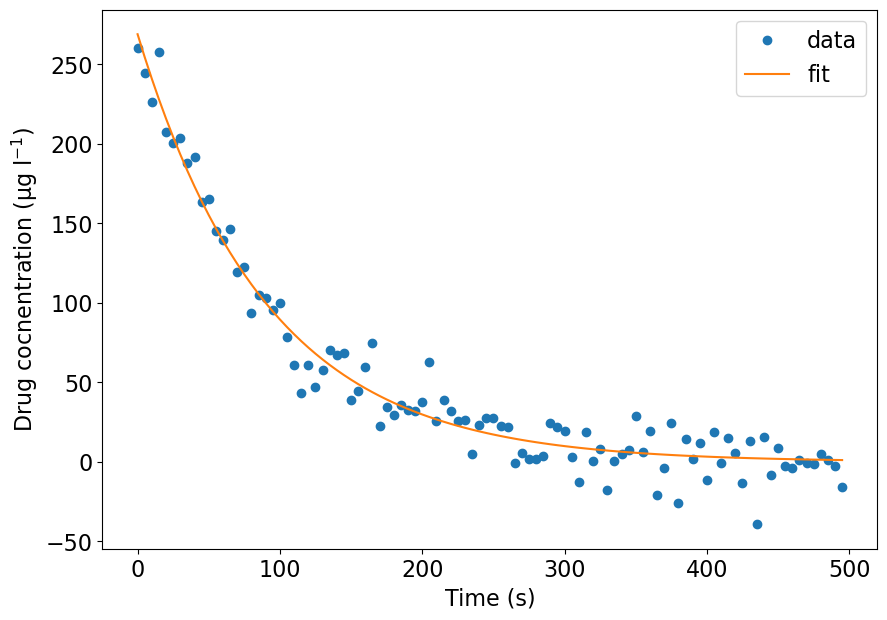

In [17]:
drugX = np.arange(0,len(drug)*5,5) # x array to plot the data against
plt.plot(drugX, drug,'o',label = 'data') # plot using a scatterplot
plt.xlabel('Time (s)')
plt.ylabel('Drug cocnentration (μg l$^{-1}$)') # axis labels

def exponential(x, tau, a): # exponetial decay equation
    return a*np.exp(-x/tau)

params, _ = fit.curve_fit(exponential,drugX, drug) # fit equation to data
plt.plot(drugX, exponential(drugX,*params),label = 'fit') # plot the fit on the graph
plt.legend() # with a legend
print('The rate constant of drug clearance was', 1/params[0],) # and the answer

def exp_decay(t, C0, k):
    return C0 * np.exp(-k * t)

popt, pcov = fit.curve_fit(exp_decay, range(len(drug)), drug)
print(popt[1])




### 6) Summarising nerve conduction velocities. 
An experimenter has measured the coduction velocity of sensory nerve fibres at 3 different sites corresponding to the different nerve fibers shown in the below table.

| Nerve type | Conduction velocity (m/s) |
|------------|---------------------------|
| C          | 0.5 - 2                   |
| Aα         | 80 -120                   |
| Aβ         | 33 - 75                   |

- The experimentor recorded from each site in 40 subjects and stored their data in the 'Fiber data' folder. 
- Each of the 40 data files contain one measuremnet from each site. 
- The sites were always recorded in the same order.

> 1) Run the cell below to initialize your conduction velocity data sets, they will appear in the 'Fibre data' folder where you launched this notebook from.

In [22]:
getfibres(ID) # this places your conduction velocity data into the 'Fiber data' folder

> 2) Load all the data and generate [box plots](https://en.wikipedia.org/wiki/Box_plot) to summarise the measured conduction velocities at each site.

nerve type: C, Conduction Velocities: [0, 5, 2]
nerve type: A , Conduction Velocities: [33, 75]


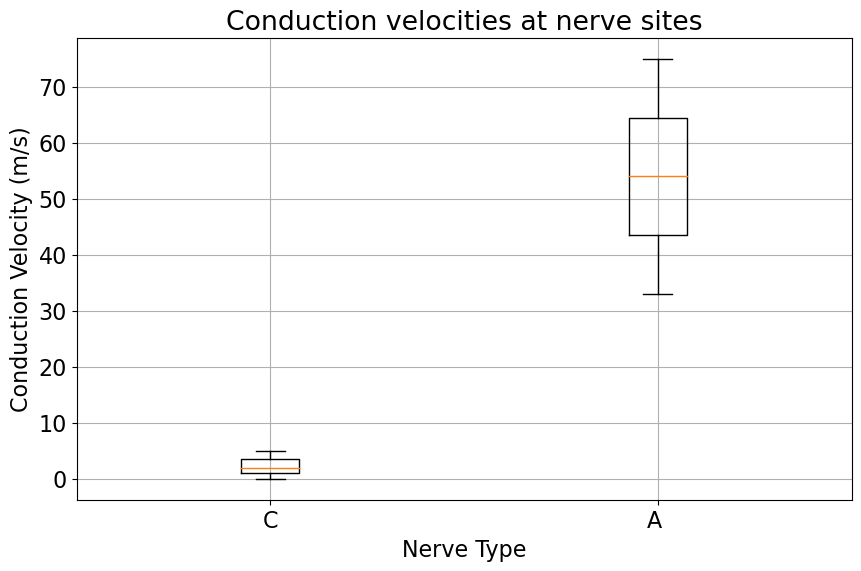

In [25]:
# fibre = glob.glob('Fibre data/*.csv')
# fibreData = np.empty((len(fibre),3))
# for f in range(len(fibre)):
#     fibreData[f] = np.loadtxt(fibre[f])
# plt.boxplot(fibreData);
# plt.xlabel('Recording site')
# plt.ylabel('Conduction Velocity m/s')


import numpy as np
import matplotlib.pyplot as plt
import glob
files = sorted(glob.glob('Fiber data/*.txt'))
conduction_velocities = {'C':[0,5,2], 'A ':[80,120], 'A ': [33,75]}

for file in files:
    with open (file, 'r') as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            conduction_velocities[list(conduction_velocities.keys())[i]].append(float(line.strip()))
for nerve_type, velocities in conduction_velocities.items():
    print(f"nerve type: {nerve_type}, Conduction Velocities: {velocities}")
    
plt.figure(figsize=(10,6))
plt.boxplot(conduction_velocities.values(), labels=conduction_velocities.keys())
plt.xlabel('Nerve Type')
plt.ylabel('Conduction Velocity (m/s)')
plt.title('Conduction velocities at nerve sites')
plt.grid(True)
plt.show()



> 3) Print some text to indicate which recording site corresponds to which fibre type.

### 7) Statement on use of generative AI
This is an [amber assessment](https://generative-ai.leeds.ac.uk/ai-and-assessments/categories-of-assessments/), use of generative AI in an assistive capacity is permitted.  
You must acknowledge the use of any AI, see the [university's guidelines on acknowledging AI use](https://generative-ai.leeds.ac.uk/ai-and-assessments/acknowledging-use-of-ai/)  
If you have used generative AI as part of completing this assessment give a brief statement describing which tool you used and how you used it. e.g. "I used chatGPT 3.5 (OpenAI) to check the syntax for generating histograms"